# Reseaux de neuronne
# Alexis Araujo

## Exercice 1

In [1]:
#Importation des librairies
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Création du dataSet
'''
    n_samples : le nombre de points de données à générer
    n_features : nombre de caractéristiques de chaque point de données
    centers : le nombre de centres à générer
    random_state : Valeur pour initialiser le générateur de nombres aléatoires
'''
X,y=make_blobs(n_samples=200, n_features=2, centers=2, random_state=42)
# changement de taille du datasets, et une valeur d'initialisation du générateur aléatoires différentes

In [3]:
# Assurer que les dimensions de nos données sont cohérentes
y=y.reshape(y.shape[0], 1)
print(X.shape,y.shape)

(200, 2) (200, 1)


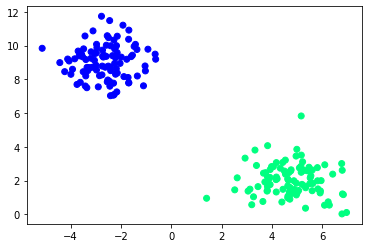

In [4]:
# Affichage des données
'''
    X[:,0] : coordonnée x
    X[:,1] : coordonnée y
'''
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter')
plt.show()

In [5]:
# Initialisation des paramètres du modèle
def initialisation(X):
    """
    Args:
    X : Les données d'entraînement. X forme (nombre d'échantillons, nombre de caractéristiques).

    Returns:
    tuple: Un tuple contenant le vecteur de poids W et le biais b initialisés aléatoirement.

    - W : Le vecteur de poids associés à chaque caractéristique, forme (nombre de caractéristiques, 1).
    - b (float): Le biais terme constant dans le modèle linéaire, un scalaire.

    Cette fonction génère des valeurs aléatoires pour initialiser les paramètres d'un modèle linéaire.
    """
    W=np.random.randn(X.shape[1],1)
    b=np.random.randn(1)
    return (W, b)

In [6]:
#Calcule la sortie d'un modèle basé sur une combinaison linéaire des caractéristiques d'entrée X avec des poids W et un biais b, suivi de l'application de la fonction sigmoïde.
def model(X,W,b):
    """
    Args:
    X : Les données d'entrée de forme (nombre d'échantillons, nombre de caractéristiques).
    W : Le vecteur de poids de forme (nombre de caractéristiques, 1).
    b (float): Le biais, un scalaire.

    Returns:
    A : La sortie du modèle.

    Cette fonction effectue les étapes suivantes :
    1. Calcule la combinaison linéaire de X avec les poids W et le biais b (Z = X.dot(W) + b).
    2. Applique la fonction sigmoïde à Z pour transformer les valeurs en un intervalle entre 0 et 1 (A = 1 / (1 + np.exp(-Z)).
    3. Renvoie A, qui représente la sortie du modèle, généralement utilisée pour des tâches de classification binaire.

    La fonction sigmoïde est couramment utilisée comme couche d'activation pour obtenir des sorties dans un intervalle compris entre 0 et 1.
    """
    Z=X.dot(W)+b
    A=1/(1+np.exp(-Z))
    # Transforme les valeurs en un intervalle 0 et 1 (Couche d'activation) pour obternir des sorties
    return A

In [7]:
# Régression logisitique
# Calcul du coût (la perte)
def logLoss(A,y):  # Ai est la probabilité prédite par le modèle pour i
    """
    Args:
    A : Les probabilités prédites par le modèle pour chaque échantillon. A vecteur de forme (nombre d'échantillons, 1).
    y : Les étiquettes de classe réelles, où 0 ou 1 représente la classe. y vecteur de forme (nombre d'échantillons, 1).

    Returns:
    float: La perte (coût) de la régression logistique.

    La fonction logLoss calcule la perte en utilisant la formule de la perte de log, pour évaluer la performance du modèle de régression logistique.
    Cette perte est utilisée pour mesurer à quel point les prédictions du modèle correspondent aux étiquettes de classe réelles.

    -> La perte est calculée en sommant la perte de log pour chaque échantillon, où la perte de log mesure l'écart entre la probabilité prédite et la classe réelle (0 ou 1).
    -> Plus la perte de log est faible, meilleure est la performance du modèle en termes de classification.
    """
    return 1/len(y)*np.sum(-y*np.log(A)-(1-y)*np.log(1-A))

In [8]:
# Gradients
# Calcul les gradients de la perte par rapport aux paramètres ( poids et vecteur)
def gradients (A,X,y):
    """
    Args:
    A : Les probabilités prédites par le modèle pour chaque échantillon. A vecteur de forme (nombre d'échantillons, 1).
    X : Les données d'entrée de forme (nombre d'échantillons, nombre de caractéristiques).
    y : Les étiquettes de classe réelles, où 0 ou 1 représente la classe. y vecteur de forme (nombre d'échantillons, 1).

    Returns:
    tuple: Un tuple contenant les gradients par rapport au vecteur de poids W et au biais b.

    - dW : Les gradients par rapport au vecteur de poids W, de forme (nombre de caractéristiques, 1).
    - db (float): Le gradient par rapport au biais b, un scalaire.

    Cette fonction calcule les gradients en utilisant la formule du gradient pour la régression logistique.
    Les gradients mesurent la pente de la perte par rapport aux paramètres du modèle et sont utilisés pour mettre à jour les paramètres lors de l'entraînement du modèle.

    -> Les gradients sont calculés en utilisant la différence entre les probabilités prédites et les étiquettes réelles (A - y) et en prenant en compte les données d'entrée X.
    -> Les gradients indiquent dans quelle direction et dans quelle mesure les paramètres du modèle doivent être ajustés pour minimiser la perte.
    """
    dW=1/len(y)*np.dot(X.T,A-y)
    db=1/len(y)*sum(A-y)
    return (dW,db)

In [9]:
# Mettre à jour les paramètres (poids et vecteur) en utilisant les gradients utilisés
def update(dW,db, W, b, learning_rate):
    """
    Args:
    dW : Les gradients par rapport au vecteur de poids W, de forme (nombre de caractéristiques, 1).
    db (float): Le gradient par rapport au biais b, un scalaire.
    W : Le vecteur de poids actuel du modèle.
    b (float): Le biais actuel du modèle.
    learning_rate (float): Le taux d'apprentissage, un scalaire positif qui contrôle la taille des mises à jour des paramètres.

    Returns:
    tuple: Un tuple contenant les paramètres mis à jour (W et b).

    Cette fonction met à jour les paramètres du modèle en utilisant les gradients calculés et le taux d'apprentissage.
    Les mises à jour sont effectuées en soustrayant le produit du gradient par le taux d'apprentissage de chaque paramètre actuel.

    -> En mettant à jour les paramètres de cette manière, le modèle apprend à ajuster ses poids et son biais pour minimiser la perte lors de l'entraînement.
    """
    W=W-learning_rate*dW
    b=b-learning_rate*db
    return (W,b)

In [10]:
# Faire les prédictions à l'aide d'un modèle Rlogi
def prediction(X,W,b):
    """
    Args:
    X : Les données d'entrée de forme (nombre d'échantillons, nombre de caractéristiques).
    W : Le vecteur de poids du modèle de Rlogi.
    b (float): Le biais du modèle de Rlogi.

    Returns:
    Un vecteur de prédictions binaires (0 ou 1) basé sur les probabilités prédites.

    Cette fonction effectue les étapes suivantes :
    1. Utilise le modèle défini (fonction model) pour calculer les probabilités prédites (A) pour chaque échantillon.
    2. Affiche les probabilités prédites.
    3. Applique un seuil de 0,5 pour décider de la classe prédite.
        Si la probabilité prédite est supérieure ou égale à 0,5, la classe prédite est 1,
            sinon c'est 0.

    -> Les prédictions résultantes sont un vecteur binaire indiquant la classe prédite pour chaque échantillon.
    """
    A=model(X,W,b)
    print(A)
    return A>=0.5

[[9.76092793e-01]
 [9.96742658e-01]
 [9.91319418e-01]
 [8.56115183e-04]
 [9.96225520e-01]
 [9.98845026e-01]
 [9.91340403e-01]
 [9.92188401e-01]
 [1.28850725e-03]
 [9.97280605e-01]
 [9.20588511e-04]
 [9.96673593e-01]
 [2.53954287e-02]
 [9.96387025e-01]
 [9.09103685e-01]
 [1.52551517e-02]
 [9.94449478e-01]
 [9.90161907e-01]
 [9.88464956e-01]
 [9.84301713e-01]
 [9.97009346e-01]
 [9.94593257e-01]
 [1.47977329e-02]
 [9.88407181e-01]
 [5.25155971e-03]
 [1.72440706e-03]
 [9.93447157e-01]
 [1.31838286e-02]
 [9.78723523e-01]
 [3.44028254e-03]
 [1.33680936e-03]
 [9.97801899e-01]
 [1.57924023e-03]
 [6.23520998e-03]
 [1.31357528e-02]
 [9.95860315e-01]
 [6.51447554e-03]
 [9.99243910e-01]
 [3.97722878e-03]
 [9.85930451e-01]
 [1.73988695e-02]
 [9.96582471e-01]
 [9.95631299e-01]
 [9.96623293e-01]
 [1.48635805e-03]
 [9.86935296e-01]
 [3.32254750e-03]
 [1.82765266e-03]
 [2.68948722e-03]
 [9.97561760e-01]
 [9.58811344e-01]
 [1.20618368e-03]
 [3.26088218e-03]
 [2.01143604e-03]
 [5.25324289e-03]
 [9.835024

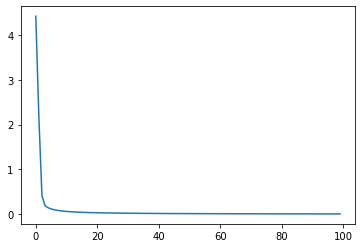

In [11]:
# Implémente un algorithme d'entrainement en utilisant la descente de gradient
def artificialNeuron(X,y, learning_rate=0.1, n_iter=100):
    """
    Args:
    X : Les données d'entrée de forme (nombre d'échantillons, nombre de caractéristiques).
    y : Les étiquettes de classe réelles, où 0/1 représente la classe. y vecteur de forme (nombre d'échantillons, 1).
    learning_rate (float): Le taux d'apprentissage, un scalaire positif qui contrôle la taille des mises à jour des paramètres (par défaut : 0,1).
    n_iter (int): Le nombre d'itérations d'entraînement (par défaut : 100).

    Returns:
    tuple: Un tuple contenant les paramètres du modèle entraîné (W et b).

    Cette fonction effectue les étapes suivantes :
    1. Initialise les paramètres du modèle (vecteur de poids W et biais b) en utilisant la fonction initialisation.
    2. Itère sur un certain nombre d'itérations (n_iter) pour entraîner le modèle.
    3. À chaque itération, calcule les probabilités prédites (A) en utilisant le modèle de régression logistique.
    4. Calcule la perte (coût) du modèle en utilisant la fonction logLoss.
    5. Calcule les gradients de la perte par rapport aux paramètres du modèle en utilisant la fonction gradients.
    6. Met à jour les paramètres (W et b) en utilisant la fonction update avec les gradients calculés.
    7. Effectue des prédictions sur les données d'entraînement en utilisant la fonction prediction.
    8. Affiche le score d'exactitude (accuracy_score) des prédictions par rapport aux étiquettes réelles.
    9. Trace le coût au fil des itérations.
    10. Renvoie les paramètres du modèle entraîné.

    -> Cet algorithme d'entraînement utilise la descente de gradient pour ajuster les paramètres du modèle afin de minimiser la perte et d'obtenir des prédictions plus précises.
    """
    #initialisation
    W,b=initialisation(X)    # Initialise les paramètres
    cout=[]
    for i in range(n_iter):
        A=model(X,W,b)       #Chercher le modèle de régression sigmoid
        cout.append(logLoss(A,y)) # Calcul du cout du modèle
        dW,db=gradients(A,X,y) # Calcul les gradients de la perte
        W,b= update(dW,db,W,b,learning_rate) # On met à jour les paramètres après avoir utilisé la descente de gradient
    y_pred=prediction(X,W,b) # Nous avons la prédiction
    print(accuracy_score(y, y_pred))
    plt.plot(cout)
    plt.show()
    return (W,b)
W,b=artificialNeuron(X,y)

In [12]:
nouvellePlante=np.array([2,1]) # Vecteur
x0=np.linspace(-1,4,100) # séquence de valeurs linéaires allant de -1 et 4
x1=(-W[0]*x0-b)/W[1] # Formule de la frontière de décision d'une Rlog

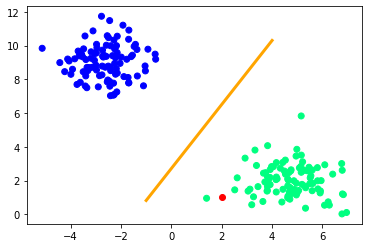

In [13]:
# Affichage de la prediction sur le modèle
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter')
# Tracer de la frontière
plt.plot(x0,x1,c='orange',lw=3)
# Affichage du point représentant la nouvelle plante (en rouge)
plt.scatter(nouvellePlante[0], nouvellePlante[1],c='r')
plt.show()

In [14]:
# La prediction
prediction(nouvellePlante, W,b)

[0.94637469]


array([ True])

## Exercice 2

In [15]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
#!pip install h5py
from utilities import *
from tqdm import tqdm
import matplotlib.pyplot as plt

In [16]:
# Chargement de données d'entrainement et de test
x_train, y_train, x_test, y_test = load_data()

In [17]:
# Afficher les dimensions des données d'entrainement et des étiquettes
print(x_train.shape)
print(y_train.shape)

(1000, 64, 64)
(1000, 1)


In [18]:
# Utilisation de np.unique avec return_counts=True pour obtenir les valeurs uniques et leurs occurrences dans y_train
print(np.unique(y_train, return_counts=True))

(array([0., 1.]), array([500, 500], dtype=int64))


In [19]:
# Affiche les dimensions des données de test et des étiquettes
print(x_test.shape)
print(y_test.shape)
# Utilisation de np.unique avec return_counts=True pour obtenir les valeurs uniques et leurs occurrences dans y_test
print(np.unique(y_test,return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


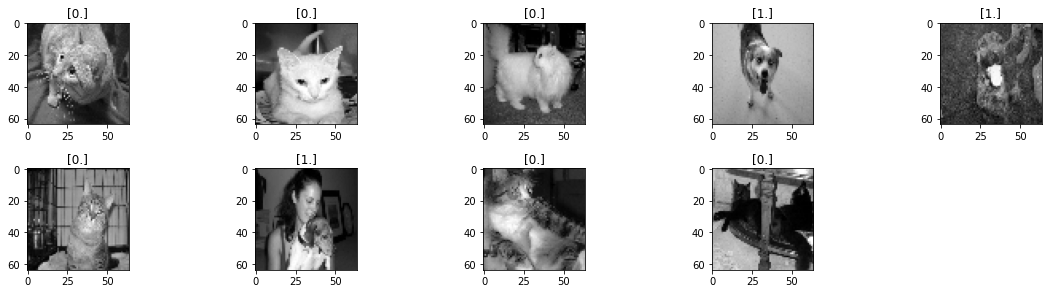

In [20]:
# Création d'une figure
plt.figure(figsize=(16,8))

# Une boucle sur les 9 premières images et leurs étiquettes pour les afficher
for i in range(1,10):
    plt.subplot(4,5,i) # sous graphique
    plt.imshow(x_train[i],cmap='gray')     # Affiche l'image (x_train[i])
    plt.title(y_train[i])   # Ajoute le titre du sous graphique en affichant les étiquettes
    plt.tight_layout() # Ajustement
plt.show()

In [21]:
# Réorganise les données d'entrainement x_train pour qu'elles soient de forme (nombre d'échantillons, -1)
# et divise toutes les valeurs par la valeur maximale de x_train pour normaliser les données.
x_train_reshape=x_train.reshape(x_train.shape[0],-1)/x_train.max()

In [22]:
# Affiche la dimension des données d'entraînement x_train_reshape après la transformation et la normalisation.
print(x_train_reshape.shape)

(1000, 4096)


In [23]:
# Calcule la valeur maximale dans les données d'entrainement x_train_reshape après la transformation et la normalisation.
x_train_reshape.max()

1.0

In [24]:
# Réorganise les données d'entrainement x_test pour qu'elles soient de forme (nombre d'échantillons, -1)
# et divise toutes les valeurs par la valeur maximale de x_train pour normaliser les données.
x_test_reshape=x_test.reshape(x_test.shape[0],-1)/x_train.max()

In [25]:
# Affiche la dimension des données d'entraînement x_test_reshape après la transformation et la normalisation.
print(x_test_reshape.shape)

(200, 4096)


In [26]:
# Calcule la valeur maximale dans les données d'entrainement x_test_reshape après la transformation et la normalisation.
x_test_reshape.max()

1.0

In [27]:
# Affiche les dimensions du tableau des étiquettes
print(y.shape)

(200, 1)


In [28]:
# Initialisation des paramètres du modèle
def initialisation(X):
    """
    Args:
    X : Les données d'entraînement. X forme (nombre d'échantillons, nombre de caractéristiques).

    Returns:
    tuple: Un tuple contenant le vecteur de poids W et le biais b initialisés aléatoirement.

    - W : Le vecteur de poids associés à chaque caractéristique, forme (nombre de caractéristiques, 1).
    - b (float): Le biais est un terme constant dans le modèle linéaire, un scalaire.

    Cette fonction génère des valeurs aléatoires pour initialiser les paramètres d'un modèle linéaire.
    """
    W=np.random.randn(X.shape[1],1)
    b=np.random.randn(1)
    return (W, b)

In [29]:
#Calcule la sortie d'un modèle basé sur une combinaison linéaire des caractéristiques d'entrée X avec des poids W et un biais b, suivi de l'application de la fonction sigmoïde.
def model(X,W,b):
    """
    Args:
    X : Les données d'entrée de forme (nombre d'échantillons, nombre de caractéristiques).
    W : Le vecteur de poids de forme (nombre de caractéristiques, 1).
    b (float): Le biais, un scalaire.

    Returns:
    A : La sortie du modèle.

    Cette fonction effectue les étapes suivantes :
    1. Calcule la combinaison linéaire de X avec les poids W et le biais b (Z = X.dot(W) + b).
    2. Applique la fonction sigmoïde à Z pour transformer les valeurs en un intervalle entre 0 et 1 (A = 1 / (1 + np.exp(-Z)).
    3. Renvoie A, qui représente la sortie du modèle, généralement utilisée pour des tâches de classification binaire.

    -> La fonction sigmoïde est couramment utilisée comme couche d'activation pour obtenir des sorties dans un intervalle compris entre 0 et 1.
    """
    Z=X.dot(W)+b
    A=1/(1+np.exp(-Z))
    return A

In [30]:
# Régression logisitique
# Calcul du coût (la perte)
def logLoss(A,y):  # Ai est la probabilité prédite par le modèle pour i
    """
    Calcule la perte log loss (entropie croisée) entre les prédictions A et les étiquettes de classe y.

    Args:
    A : Un tableau de probabilités prédites par le modèle (probabilité d'appartenance à la classe positive).
    y : Un tableau d'étiquettes de classe réelles (0 ou 1) correspondant aux échantillons.

    Returns:
    float: La perte log loss calculée.

    Cette fonction calcule la perte log loss, qui mesure la divergence entre les probabilités prédites (A) et les étiquettes de classe réelles (y).
    La formule inclut une petite valeur epsilon (1e-15) pour éviter les problèmes numériques lorsque A est proche de 0 ou 1, ce qui pourrait entraîner des erreurs de calcul avec le logarithme.

    -> La perte log loss quantifie la qualité des prédictions du modèle, et l'objectif de l'entraînement est de minimiser cette perte pour obtenir des prédictions précises.
    """
    epsilon=1e-15
    return 1/len(y)*np.sum(-y*np.log(A+epsilon)-(1-y)*np.log(1-A+epsilon))

In [31]:
# Gradients
# Calcul les gradients de la perte par rapport aux paramètres ( poids et vecteur)
def gradients (A,X,y):
    """
    Args:
    A : Les probabilités prédites par le modèle pour chaque échantillon. A vecteur de forme (nombre d'échantillons, 1).
    X : Les données d'entrée de forme (nombre d'échantillons, nombre de caractéristiques).
    y : Les étiquettes de classe réelles, où 0 ou 1 représente la classe. y vecteur de forme (nombre d'échantillons, 1).

    Returns:
    tuple: Un tuple contenant les gradients par rapport au vecteur de poids W et au biais b.

    - dW : Les gradients par rapport au vecteur de poids W, de forme (nombre de caractéristiques, 1).
    - db (float): Le gradient par rapport au biais b, un scalaire.

    Cette fonction calcule les gradients en utilisant la formule du gradient pour la régression logistique.
    Les gradients mesurent la pente de la perte par rapport aux paramètres du modèle et sont utilisés pour mettre à jour les paramètres lors de l'entraînement du modèle.

    -> Les gradients sont calculés en utilisant la différence entre les probabilités prédites et les étiquettes réelles (A - y) et en prenant en compte les données d'entrée X.
    -> Les gradients indiquent dans quelle direction et dans quelle mesure les paramètres du modèle doivent être ajustés pour minimiser la perte.
    """
    dW=1/len(y)*np.dot(X.T,A-y)
    db=1/len(y)*sum(A-y)
    return (dW,db)

In [32]:
# Mettre à jour les paramètres (poids et vecteur) en utilisant les gradients utilisés
def update(dW,db, W, b, learning_rate):
    """
    Args:
    dW : Les gradients par rapport au vecteur de poids W, de forme (nombre de caractéristiques, 1).
    db (float): Le gradient par rapport au biais b, un scalaire.
    W : Le vecteur de poids actuel du modèle.
    b (float): Le biais actuel du modèle.
    learning_rate (float): Le taux d'apprentissage, un scalaire positif qui contrôle la taille des mises à jour des paramètres.

    Returns:
    tuple: Un tuple contenant les paramètres mis à jour (W et b).

    Cette fonction met à jour les paramètres du modèle en utilisant les gradients calculés et le taux d'apprentissage.
    Les mises à jour sont effectuées en soustrayant le produit du gradient par le taux d'apprentissage de chaque paramètre actuel.

    -> En mettant à jour les paramètres de cette manière, le modèle apprend à ajuster ses poids et son biais pour minimiser la perte lors de l'entraînement.
    """
    W=W-learning_rate*dW
    b=b-learning_rate*db
    return (W,b)

In [33]:
# Faire les prédictions à l'aide d'un modèle Rlogi
def prediction(X,W,b):
    """
    Args:
    X : Les données d'entrée de forme (nombre d'échantillons, nombre de caractéristiques).
    W : Le vecteur de poids du modèle de Rlogi.
    b (float): Le biais du modèle de Rlogi.

    Returns:
    Un vecteur de prédictions binaires (0 ou 1) basé sur les probabilités prédites.

    Cette fonction effectue les étapes suivantes :
    1. Utilise le modèle défini (fonction model) pour calculer les probabilités prédites (A) pour chaque échantillon.
    2. Affiche les probabilités prédites.
    3. Applique un seuil de 0,5 pour décider de la classe prédite.
        Si la probabilité prédite est supérieure ou égale à 0,5, la classe prédite est 1,
            sinon c'est 0.

    -> Les prédictions résultantes sont un vecteur binaire indiquant la classe prédite pour chaque échantillon.
    """
    A=model(X,W,b)
    #print(A)
    return A>=0.5

In [34]:
# Entraîne un modèle de régression logistique (neurone artificiel) en utilisant la descente de gradient stochastique.
def artificialNeuron(x_train,y_train,x_test,y_test, learning_rate=0.01, n_iter=10000):
    """
    Args:
    x_train : Données d'entraînement.
    y_train : Étiquettes de classe d'entraînement.
    x_test : Données de test.
    y_test : Étiquettes de classe de test.
    learning_rate (float): Taux d'apprentissage pour la descente de gradient.
    n_iter (int): Nombre d'itérations d'entraînement.

    Returns:
    tuple: Un tuple contenant les paramètres du modèle entraîné (W, b).

    Elle suit un processus itératif où elle calcule la perte et l'exactitude sur les données d'entraînement et de test à intervalles réguliers et met à jour les paramètres du modèle.
    À la fin de l'entraînement, elle affiche les courbes de coût et d'exactitude pour l'entraînement et le test.
    """
    #initialisation
    W,b=initialisation(x_train)
    train_cout=[]
    train_accuracy=[]
    test_cout=[]
    test_accuracy=[]
    cout=[]
    accuracy=[]
    for i in tqdm(range(n_iter)):
        # activation
        A=model(x_train,W,b)
        if i%10==0:
        #train cout/accuracy
            train_cout.append(logLoss(A,y_train))
            #precision
            y_pred=prediction(x_train,W,b)
            train_accuracy.append(accuracy_score(y_train,y_pred))
        #test cout/accuracy
            A_test=model(x_test, W,b)
            test_cout.append(logLoss(A_test,y_test))
            #precision
            y_pred=prediction(x_test,W,b)
            test_accuracy.append(accuracy_score(y_test,y_pred))
        #mise à jour
        dW,db=gradients(A,x_train,y_train)
        W,b= update(dW,db,W,b,learning_rate)

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(train_cout, label='train_cout')
    plt.plot(test_cout, label='test_cout')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(train_accuracy, label='train_accuracy')
    plt.plot(test_accuracy, label='test_accuracy')
    plt.legend()
    plt.show()
    return (W,b)

100%|██████████| 10000/10000 [01:08<00:00, 145.85it/s]


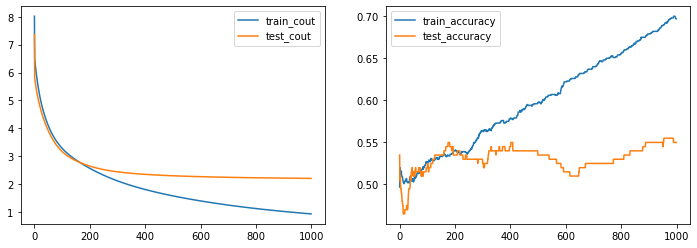

In [35]:
# Appel de la fonction et affichage des courbes de coût et d'exactitude pour l'entraînement et le test
W,b=artificialNeuron(x_train_reshape,y_train,x_test_reshape, y_test)